In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
items = pd.read_csv('../data/input/items.csv')
item_categories = pd.read_csv('../data/input/item_categories.csv')
shops = pd.read_csv('../data/input/shops.csv')
sales_train = pd.read_csv('../data/input/sales_train.csv')
test = pd.read_csv('../data/input/test.csv')

# Preprocessing

In [18]:
# shopsの確認
shops['shop_name'].value_counts()

Курск ТЦ "Пушкинский"                              1
РостовНаДону ТЦ "Мега"                             1
Красноярск ТЦ "Взлетка Плаза"                      1
Якутск Орджоникидзе, 56                            1
Томск ТРЦ "Изумрудный Город"                       1
Адыгея ТЦ "Мега"                                   1
Мытищи ТРК "XL-3"                                  1
Тюмень ТЦ "Зеленый Берег"                          1
Сергиев Посад ТЦ "7Я"                              1
Москва ТЦ "МЕГА Белая Дача II"                     1
Калуга ТРЦ "XXI век"                               1
Воронеж ТРЦ "Максимир"                             1
Москва Магазин С21                                 1
Москва МТРЦ "Афи Молл"                             1
Москва ТРК "Атриум"                                1
Самара ТЦ "ПаркХаус"                               1
Москва ТК "Буденовский" (пав.К7)                   1
Новосибирск ТЦ "Мега"                              1
!Якутск Орджоникидзе, 56 фран                 

In [19]:
# 都市名カラム作成
shops['shop_city_name'] = shops['shop_name'].apply(lambda x:x.split(' ')[0])
shops['shop_city_name'].value_counts()

Москва              13
Воронеж              3
РостовНаДону         3
Тюмень               3
Новосибирск          2
СПб                  2
Жуковский            2
Красноярск           2
Якутск               2
!Якутск              2
Уфа                  2
Казань               2
Н.Новгород           2
Самара               2
Волжский             1
Томск                1
Чехов                1
Сергиев              1
Ярославль            1
Курск                1
Вологда              1
Омск                 1
Выездная             1
Коломна              1
Интернет-магазин     1
Адыгея               1
Цифровой             1
Калуга               1
Балашиха             1
Химки                1
Мытищи               1
Сургут               1
Name: shop_city_name, dtype: int64

|Russian|English|
|--:|:--|
Балашиха|Balashikha|
Волжский|Volzhsky|
Вологда|Vologda|
Воронеж|Voronezh|
Выездная|Outgoing|
Жуковский|Zhukovsky|
Интернет-магазин|Online store|
Казань|Kazan|
Калуга|Kaluga|
Коломна|Kolomna|
Красноярск|Krasnoyarsk|
Курск|Kursk|
Москва|Moscow|
Мытищи|Mytishchi|
Н.Новгород|N.Novgorod|
Новосибирск|Novosibirsk|
Омск|Omsk|
РостовНаДону|Rostov-on-Don|
Самара|Samara|
Сергиев|Sergiev|
СПб|SPb|
Сургут|Surgut|
Томск|Tomsk|
Тюмень|Tyumen|
Уфа|Ufa|
Химки|Khimki|
Цифровой|Digital|
Чехов|Chekhov|
Якутск|Yakutsk|
Ярославль|Yaroslavl|

In [20]:
# 表記揺れを修正
shops.loc[shops['shop_city_name']=='!Якутск', \
         'shop_city_name'] = 'Якутск'
shops['shop_city_name'].value_counts()

Москва              13
Якутск               4
РостовНаДону         3
Воронеж              3
Тюмень               3
Новосибирск          2
Н.Новгород           2
СПб                  2
Жуковский            2
Красноярск           2
Уфа                  2
Казань               2
Самара               2
Курск                1
Волжский             1
Томск                1
Сергиев              1
Чехов                1
Сургут               1
Химки                1
Ярославль            1
Омск                 1
Вологда              1
Коломна              1
Интернет-магазин     1
Адыгея               1
Цифровой             1
Калуга               1
Балашиха             1
Мытищи               1
Выездная             1
Name: shop_city_name, dtype: int64

In [38]:
shops

,shop_name,shop_id,shop_city_name
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная


In [21]:
# item_categoriesに大分類を追加
item_categories['major_item_category'] = \
item_categories['item_category_name'].apply(lambda x:x.split(' - ')[0])
print(item_categories['major_item_category'].value_counts(), '\n')
# 中分類を追加
item_categories['sub_item_category'] = item_categories['major_item_category']
print(item_categories['sub_item_category'].value_counts(), '\n')

Книги                                13
Подарки                              12
Игры                                  8
Игровые консоли                       8
Аксессуары                            7
Музыка                                6
Программы                             6
Кино                                  5
Игры PC                               4
Карты оплаты                          4
Служебные                             2
PC                                    1
Чистые носители (штучные)             1
Чистые носители (шпиль)               1
Доставка товара                       1
Карты оплаты (Кино, Музыка, Игры)     1
Элементы питания                      1
Игры Android                          1
Билеты (Цифра)                        1
Игры MAC                              1
Name: major_item_category, dtype: int64 

Книги                                13
Подарки                              12
Игры                                  8
Игровые консоли                       

|Russian|English|
|--:|:--|
Аксессуары|accessory|
Игры Android|android game|
Элементы питания|battery|
Чистые носители (штучные)|blank media (piece)|
Чистые носители (шпиль)|blank media(spire)|
Книги|book|
Кино|cinema|
Доставка товара|    delivery of good  |
Игры|    game  |
Игровые консоли  |  game console  |
Подарки |   gift  |
Игры MAC   | MAC game  |
Музыка|    music  |
Карты оплаты   | payment card  |
Карты оплаты (Кино, Музыка, Игры)   | payment cards (Cinema, Music, Games)  |
PC   | PC  |
Игры PC  |  PC game  |
Программы    |program  |
Служебные |   service  |
Билеты (Цифра) |   tickets(Number)  |

In [22]:
# 大分類の類似項目を集約
item_categories.loc[item_categories['major_item_category'] == 'Игровые консоли',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Игры PC',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Игры MAC',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Игры Android',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Карты оплаты (Кино, Музыка, Игры)',\
                   'major_item_category'] = 'Карты оплаты'
item_categories.loc[item_categories['major_item_category'] == 'Чистые носители (шпиль)',\
                   'major_item_category'] = 'Чистые носители'
item_categories.loc[item_categories['major_item_category'] == 'Чистые носители (штучные)',\
                   'major_item_category'] = 'Чистые носители'

print(item_categories['major_item_category'].value_counts(), '\n')
print(item_categories['sub_item_category'].value_counts(),'\n')

Игры                22
Книги               13
Подарки             12
Аксессуары           7
Музыка               6
Программы            6
Кино                 5
Карты оплаты         5
Чистые носители      2
Служебные            2
PC                   1
Билеты (Цифра)       1
Элементы питания     1
Доставка товара      1
Name: major_item_category, dtype: int64 

Книги                                13
Подарки                              12
Игры                                  8
Игровые консоли                       8
Аксессуары                            7
Музыка                                6
Программы                             6
Кино                                  5
Игры PC                               4
Карты оплаты                          4
Служебные                             2
PC                                    1
Чистые носители (штучные)             1
Чистые носители (шпиль)               1
Доставка товара                       1
Карты оплаты (Кино, Музыка, Игры)   

In [23]:
# 異常値(外れ値、負値)の処理
sales_train = sales_train[sales_train.item_cnt_day < 100000]
sales_train = sales_train[sales_train.item_price < 1250]

median = sales_train[(sales_train.shop_id==32)&\
                     (sales_train.item_id==2973)&\
                     (sales_train.date_block_num==4)&\
                     (sales_train.item_price>0)].item_price.median()
sales_train.loc[sales_train.item_price < 0, 'item_price'] = median

In [24]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")
sales_train['year'] = sales_train.date.dt.year
sales_train['month'] = sales_train.date.dt.month
sales_train['day'] = sales_train.date.dt.day
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-02-01,0,59,22154,999.0,1.0,2013,2,1
1,2013-03-01,0,25,2552,899.0,1.0,2013,3,1
2,2013-05-01,0,25,2552,899.0,-1.0,2013,5,1
4,2013-01-15,0,25,2555,1099.0,1.0,2013,1,15
5,2013-10-01,0,25,2564,349.0,1.0,2013,10,1


In [25]:
# 月次集計に変換
sales_train['date_sales'] = sales_train['item_cnt_day'] * sales_train['item_price']

month_shop_item_cnt = sales_train[['date_block_num', 'shop_id', 'item_id', 'item_cnt_day']].\
groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).\
sum().rename(columns={'item_cnt_day':'month_shop_item_cnt'})
display(month_shop_item_cnt.head(10))

,date_block_num,shop_id,item_id,month_shop_item_cnt
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
5,0,0,61,1.0
6,0,0,75,1.0
7,0,0,88,1.0
8,0,0,95,1.0
9,0,0,96,1.0


In [26]:
month_shop_item_sales = sales_train[['date_block_num', 'shop_id', 'item_id', 'date_sales']].\
groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).sum().\
rename(columns={'date_sales':'month_shop_item_sales'})
display(month_shop_item_sales.head(10))

,date_block_num,shop_id,item_id,month_shop_item_sales
0,0,0,32,1326.0
1,0,0,33,1041.0
2,0,0,35,247.0
3,0,0,43,221.0
4,0,0,51,257.0
5,0,0,61,195.0
6,0,0,75,76.0
7,0,0,88,76.0
8,0,0,95,193.0
9,0,0,96,70.0


# Create Train Data

In [27]:
train_full_comb = pd.DataFrame()
for i in range(35):
    mid = test[['shop_id', 'item_id']]
    mid['date_block_num'] = i
    train_full_comb = pd.concat([train_full_comb, mid], axis=0)
train_full_comb

,shop_id,item_id,date_block_num
0,5,5037,0
1,5,5320,0
2,5,5233,0
3,5,5232,0
4,5,5268,0
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34
214198,45,19648,34


In [28]:
# 月次売上商品数
train = pd.merge(
    train_full_comb,
    month_shop_item_cnt, 
    on=['date_block_num', 'shop_id', 'item_id'],
    how='left'
)
train.head()

,shop_id,item_id,date_block_num,month_shop_item_cnt
0,5,5037,0,NaN
1,5,5320,0,NaN
2,5,5233,0,NaN
3,5,5232,0,NaN
4,5,5268,0,NaN


In [29]:
# 月次売上金額
train = pd.merge(
    train, 
    month_shop_item_sales,
    on=['date_block_num', 'shop_id', 'item_id'],
    how='left'
)
train.head()

,shop_id,item_id,date_block_num,month_shop_item_cnt,month_shop_item_sales
0,5,5037,0,NaN,NaN
1,5,5320,0,NaN,NaN
2,5,5233,0,NaN,NaN
3,5,5232,0,NaN,NaN
4,5,5268,0,NaN,NaN


In [30]:
train = pd.merge(
    train,
    items[['item_id', 'item_category_id']],
    on='item_id',
    how='left'
)

train = pd.merge(
    train,
    item_categories[['item_category_id', 'major_item_category']],
    on='item_category_id',
    how='left'
)

train = pd.merge(
    train,
    shops[['shop_id', 'shop_city_name']],
    on='shop_id',
    how='left'
)
display(train)

,shop_id,item_id,date_block_num,month_shop_item_cnt,month_shop_item_sales,item_category_id,major_item_category,shop_city_name
0,5,5037,0,NaN,NaN,19,Игры,Вологда
1,5,5320,0,NaN,NaN,55,Музыка,Вологда
2,5,5233,0,NaN,NaN,19,Игры,Вологда
3,5,5232,0,NaN,NaN,23,Игры,Вологда
4,5,5268,0,NaN,NaN,20,Игры,Вологда
...,...,...,...,...,...,...,...,...
7496995,45,18454,34,NaN,NaN,55,Музыка,Самара
7496996,45,16188,34,NaN,NaN,64,Подарки,Самара
7496997,45,15757,34,NaN,NaN,55,Музыка,Самара
7496998,45,19648,34,NaN,NaN,40,Кино,Самара


# Visualization Data

Text(0.5, 1.0, 'Monthly item counts')

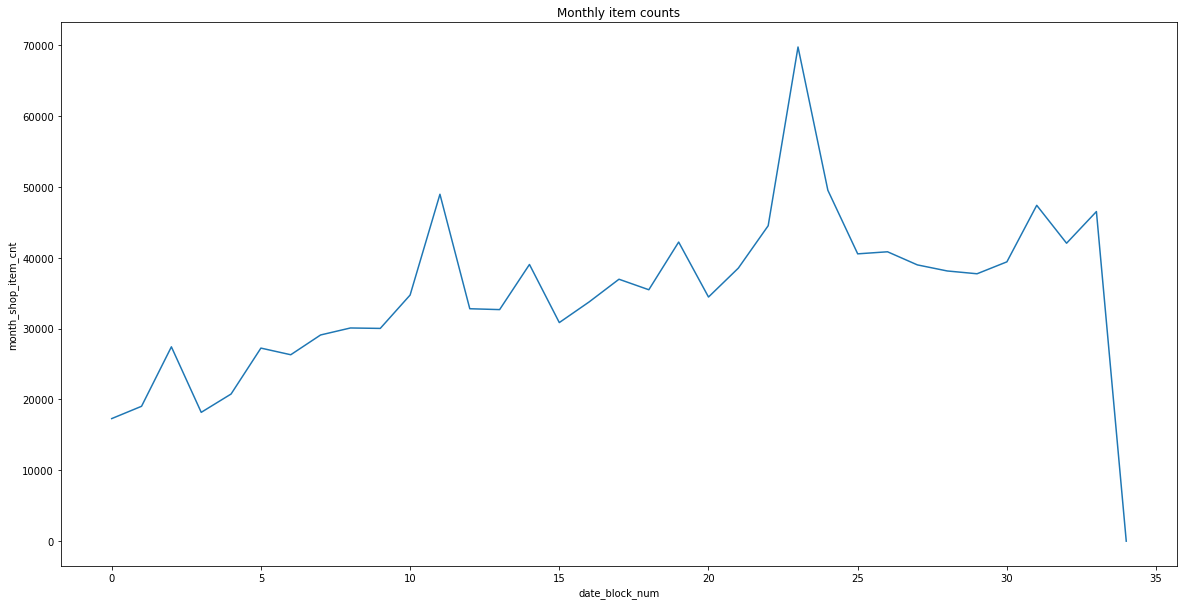

In [33]:
plt_df = train.groupby('date_block_num', as_index=False).sum()
plt.figure(figsize=(20, 10))
sns.lineplot(x='date_block_num', y='month_shop_item_cnt', data=plt_df)
plt.title('Monthly item counts')

Text(0.5, 1.0, 'Monthly item counts by major vategory')

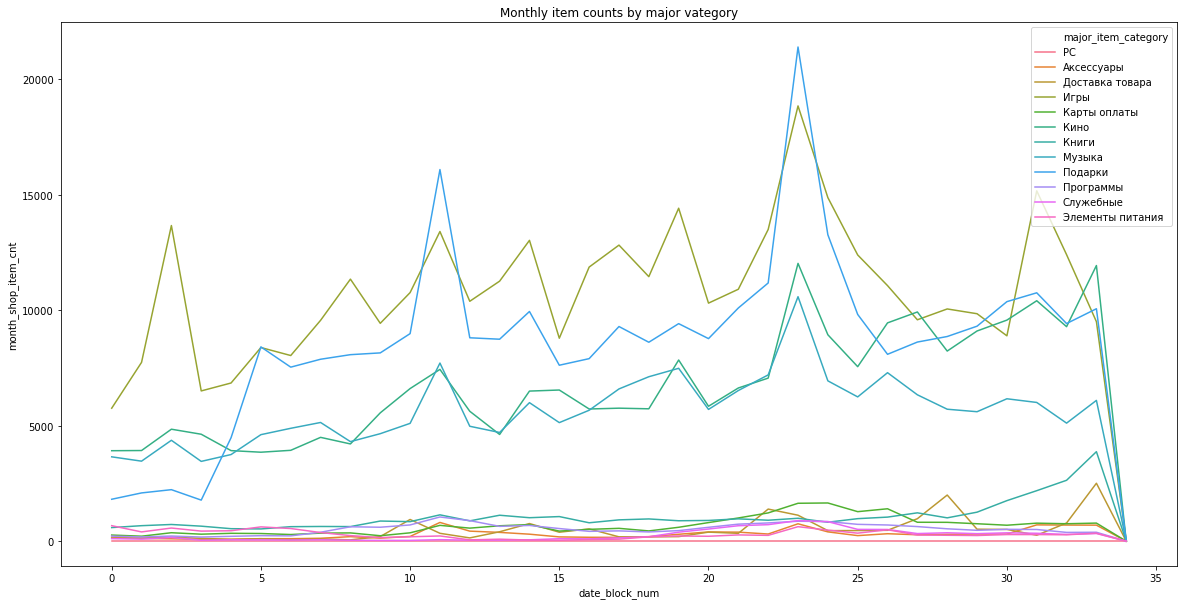

In [34]:
plt_df = train.groupby(['date_block_num', 'major_item_category'], as_index=False).sum()
plt.figure(figsize=(20, 10))
sns.lineplot(
    x='date_block_num',
    y='month_shop_item_cnt',
    data=plt_df, 
    hue='major_item_category'
)
plt.title('Monthly item counts by major vategory')

Text(0.5, 1.0, 'Monthly item counts by city_name')

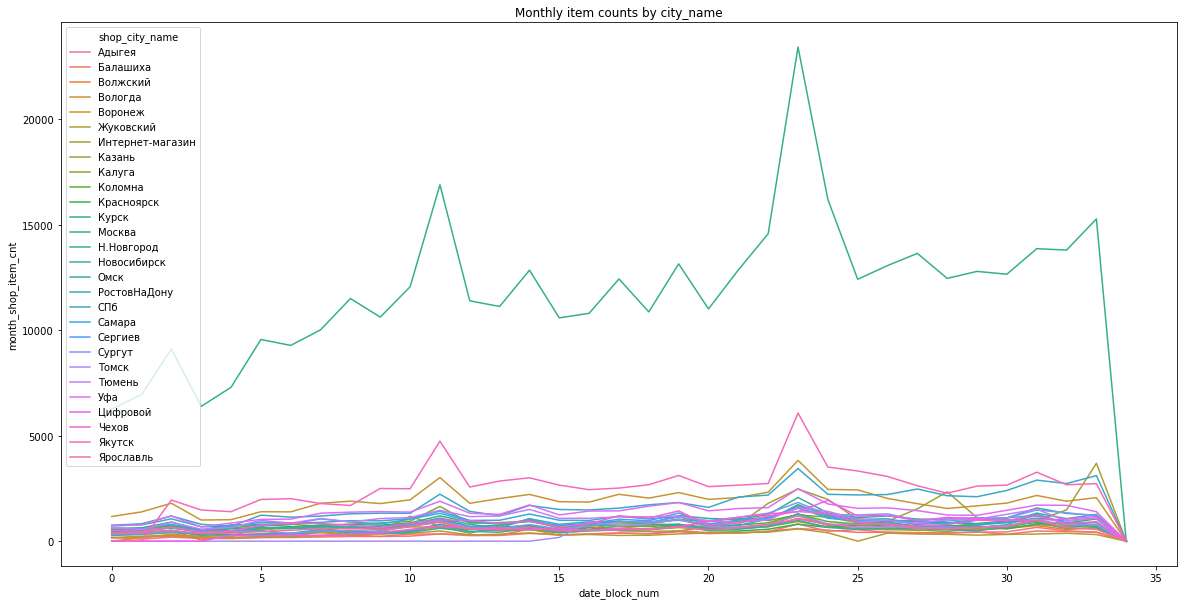

In [39]:
plt_df = train.groupby(['date_block_num', 'shop_city_name'], as_index=False).sum()
plt.figure(figsize=(20, 10))
sns.lineplot(
    x='date_block_num',
    y='month_shop_item_cnt',
    data=plt_df,
    hue='shop_city_name'
)
plt.title('Monthly item counts by city_name')

In [40]:
grouped = sales_train[sales_train['month']==12].groupby(['shop_id', 'item_id'], as_index=False)
grouped.mean()[['shop_id', 'item_id', 'item_cnt_day']]

,shop_id,item_id,item_cnt_day
0,0,32,2.000000
1,0,98,1.000000
2,0,952,1.000000
3,0,963,1.000000
4,0,1001,1.000000
...,...,...,...
108924,59,22087,1.800000
108925,59,22088,2.133333
108926,59,22091,2.000000
108927,59,22092,1.571429
